# 1 Data

## 1. 读取年度ESG数据

In [2]:
import pandas as pd
path='datasets/华证2009-2023年（含细分项+季度)）/华证esg评级2009-2023（细分项）/华证esg评级含细分项（年度）2009-2023.xlsx'
ESG_df = pd.read_excel(path, dtype={'股票代码':str})
ESG_df['股票代码'] = ESG_df['股票代码'].str.zfill(6)
ESG_df.head(1)

,股票代码,年份,综合评级,综合得分,E评级,E得分,S评级,S得分,G评级,G得分,...,重污染分组2,重污染分组3,所属省份代码,所属省份,所属城市代码,所属城市,是否属于西部,是否属于东部,是否属于中部,产权性质
0,000001,2009,BBB,82.38,CCC,69.87,BB,77.46,AA,91.77,...,0.0,0.0,440000.0,广东省,440300.0,深圳市,0.0,1.0,0.0,0.0


## 2. 价格数据

In [4]:
import pandas as pd
#close_df = pd.read_csv('datasets/processed_data/close.csv', index_col=0)
close_df = pd.read_csv('datasets/processing/close.csv')
close_df.index = close_df['time']
close_df.index = pd.to_datetime(close_df.index)
close_df = close_df.iloc[:, 1:]
#close_df.index = pd.to_datetime(close_df.index)
close_df.head(1)

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,601933,601939,601958,601988,601989,601991,601992,601996,601998,601999
time,,,,,,,,,,,,,,,,,,,,,
2010-01-04,926.73,1091.9,NaN,61.24,158.64,55.68,NaN,47.34,39.24,35.42,...,NaN,6.42,23.12,4.56,7.63,18.49,NaN,NaN,8.26,11.42


In [5]:
import numpy as np
from tqdm.notebook import tqdm

In [6]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 
import matplotlib.pyplot as plt

ESG_rating:['AAA']
ESG_rating:['AA']
ESG_rating:['A']
ESG_rating:['BBB']
ESG_rating:['BB']
ESG_rating:['B']
ESG_rating:['CCC']
ESG_rating:['CC']
ESG_rating:['C']


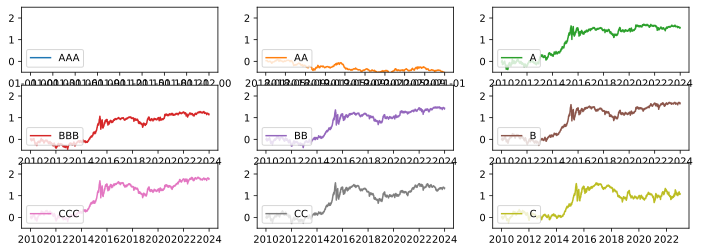

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,4)) 
ax = ax.flatten()
i = 0
ESG_res = {}
for e in [['AAA'], ['AA'], ['A'], ['BBB'],['BB'],['B'],['CCC'],['CC'],['C']]:
    print('ESG_rating:%s' %e)
    ESG_res[e[0]] = {}
    all_avg_ret = pd.DataFrame()
    for year in close_df.index.year.unique():  # 年份
        #print('year:%s' %year)
        sub_ESG_df = ESG_df[ESG_df['年份'] == year]
        sub_sub_ESG_df = sub_ESG_df[sub_ESG_df['综合评级'].isin(e)]
        
        #print('ESG个数：',sub_sub_ESG_df.shape[0])
        c = close_df.loc[[i for i in close_df.index if i.year == year]]
        
        #print('有价格数据的个数:', c.shape[1])
        code_list = np.intersect1d(sub_sub_ESG_df['股票代码'].values, c.columns.values)
        
        #print('year:%s' %year, '有价格数据的ESG个数：', len(code_list))
        ESG_res[e[0]][year] =  len(code_list)
        ret = c[code_list].diff()/c[code_list].shift(1)
        avg_ret = ret.mean(axis=1)
        all_avg_ret = pd.concat([all_avg_ret, avg_ret])
    cum_ret = all_avg_ret.cumsum()
    ax[i].plot(pd.to_datetime(cum_ret.index), cum_ret, label=' & '.join(e), color='C%s' %i)
    ax[i].set_ylim(-0.5, 2.5)
    ax[i].legend(loc=3)
    i += 1
#plt.savefig('ESG_ret.eps')
plt.show()

In [8]:
pd.DataFrame(ESG_res)

,AAA,AA,A,BBB,BB,B,CCC,CC,C
2010,0,0,1,65,440,843,383,81,22
2011,0,0,4,141,618,892,362,93,20
2012,0,0,6,164,665,864,359,88,32
2013,0,0,11,133,661,840,396,108,29
2014,0,0,7,135,578,876,418,131,33
2015,0,0,4,111,544,872,475,127,45
2016,0,0,3,137,543,784,478,163,70
2017,0,0,16,190,569,734,458,146,65
2018,0,3,21,233,609,696,392,156,68
2019,0,1,32,263,544,608,418,174,139


In [1]:
from lib.volatility import calculate_volatility
vol_df = calculate_volatility(open_df, high_df, low_df, close_df)

NameError: name 'open_df' is not defined

In [14]:
vol_df.index = pd.to_datetime(vol_df.index)
vol_df.to_csv('datasets/processing/vol_df.csv')
vol_df.head(1)

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,601933,601939,601958,601988,601989,601991,601992,601996,601998,601999
time,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.015717,0.010109,NaN,0.016369,0.009498,0.012674,NaN,0.011762,0.015458,0.005756,...,NaN,0.015133,0.010491,0.01207,0.012642,0.012517,NaN,NaN,0.014804,0.017653


In [16]:
all_avg_vol = pd.DataFrame()
for e in [['AAA', 'AA', 'A'], ['BBB'],['BB'],['B'],['CCC'],['CC','C']]:
    print('ESG_rating:%s' %e)
    avg_vol = pd.DataFrame()
    for year in vol_df.index.year.unique():
        sub_ESG_df = ESG_df[ESG_df['年份'] == year]
        sub_sub_ESG_df = sub_ESG_df[sub_ESG_df['综合评级'].isin(e)]
        v = vol_df.loc[[i for i in vol_df.index if i.year == year]]
        code_list = np.intersect1d(sub_sub_ESG_df['股票代码'].values, v.columns.values)
        #print('year:%s' %year, '有价格数据的ESG个数：', len(code_list))
        vol = v[code_list].mean(axis=1)                                # 波动率平均
        avg_vol = pd.concat([avg_vol, vol])
    avg_vol.columns = [' & '.join(e)]
    avg_vol = avg_vol.dropna()
    all_avg_vol = pd.concat([all_avg_vol, avg_vol], axis=1)
    #print(all_avg_vol)
    #break
    #avg_vol.columns = [' & '.join(e)]
    #avg_vol = avg_vol.dropna()
    # 
    # d = {}
    # d['Mean'] = all_avg_vol.mean().values[0]
    # d['Median'] = all_avg_vol.median().values[0]
    # d['Std'] = all_avg_vol.std().values[0]
    # d['Min'] = all_avg_vol.min().values[0]
    # d['Max'] = all_avg_vol.max().values[0]
    # d['Skew'] = all_avg_vol.skew().values[0]
    # d['Kurt'] = all_avg_vol.kurt().values[0]
    # d['Kurt'] = all_avg_vol.kurt().values[0]
    # d = pd.DataFrame(d, index=[' & '.join(e)])
    #describe = pd.concat([describe, d], axis=0)

ESG_rating:['AAA', 'AA', 'A']
ESG_rating:['BBB']
ESG_rating:['BB']
ESG_rating:['B']
ESG_rating:['CCC']
ESG_rating:['CC', 'C']


In [17]:
from lib.description import descriptive_statistics
desc_stats = descriptive_statistics(all_avg_vol.dropna(), precision=4)
desc_stats

,SampleSize,Mean,Median,StdDev,Min,Max,Skewness,Kurtosis,Jarque-Bera Stat,ADF Stat
AAA & AA & A,3397,0.0199,0.0176,0.0093,0.0053,0.1123,2.7351,12.8812,27641.3597,-4.3988 ***
BBB,3397,0.0207,0.0190,0.0073,0.0103,0.0926,2.9971,15.1757,37575.0590,-5.042 ***
BB,3397,0.0223,0.0206,0.0076,0.0116,0.0998,3.0756,16.1377,42095.4245,-4.7348 ***
B,3397,0.0231,0.0213,0.0078,0.0123,0.1012,3.0263,15.5676,39374.7525,-4.5216 ***
CCC,3397,0.0239,0.0221,0.0078,0.0109,0.1014,2.9094,14.6299,34986.1991,-4.1958 ***
CC & C,3397,0.0244,0.0227,0.0074,0.0126,0.0967,2.8435,14.1683,32896.2324,-3.832 ***


In [18]:
all_avg_vol.dropna().shape

(3397, 6)